In [1]:
system('sudo add-apt-repository ppa:ubuntugis/ubuntugis-unstable')
system('sudo apt-get update')
system('sudo apt-get install libudunits2-dev libgdal-dev libgeos-dev libproj-dev')

In [2]:
install.packages('pacman')
pacman::p_load('tidyverse','OpenStreetMap','ggsn','cowplot','maps','rgdal')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rJava’, ‘raster’, ‘rgdal’, ‘sp’



OpenStreetMap installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’, ‘RgoogleMaps’, ‘plyr’, ‘rjson’, ‘jpeg’, ‘bitops’, ‘sf’, ‘png’, ‘maptools’, ‘ggmap’



ggsn installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


cowplot installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


maps installed




Package names
```
packages <- c('tidyverse','OpenStreetMap','ggsn','cowplot','maps')
```

Install packages not yet installed
```
project_packages <- packages %in% rownames(installed.packages())
if (any(project_packages == FALSE)) {
  install.packages(packages[!project_packages])
}
```

Packages loading
```
lapply(packages, library, character.only = TRUE))
```
Blog post from [Antoine Soetewey](https://statsandr.com/blog/an-efficient-way-to-install-and-load-r-packages/)

In [38]:
off_campus_points <- read.csv('https://raw.githubusercontent.com/chrismgentry/GIS1-Exercise-6/main/Data/off-campus-dining.csv')

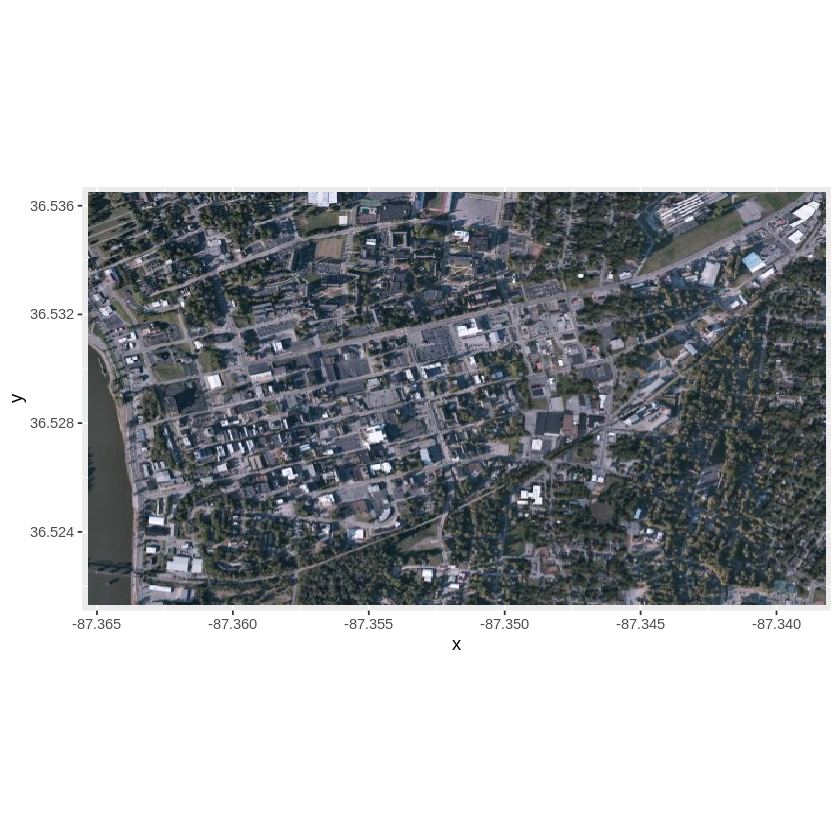

In [4]:
campusMap <- suppressWarnings(openmap(c(max(off_campus_points$y)+0.001,min(off_campus_points$x)-0.001),
                                      c(min(off_campus_points$y)-0.001,max(off_campus_points$x)+0.001), 
                                      type='bing'))
APSU <- openproj(campusMap, CRS = 'epsg 4326')
autoplot.OpenStreetMap(APSU)

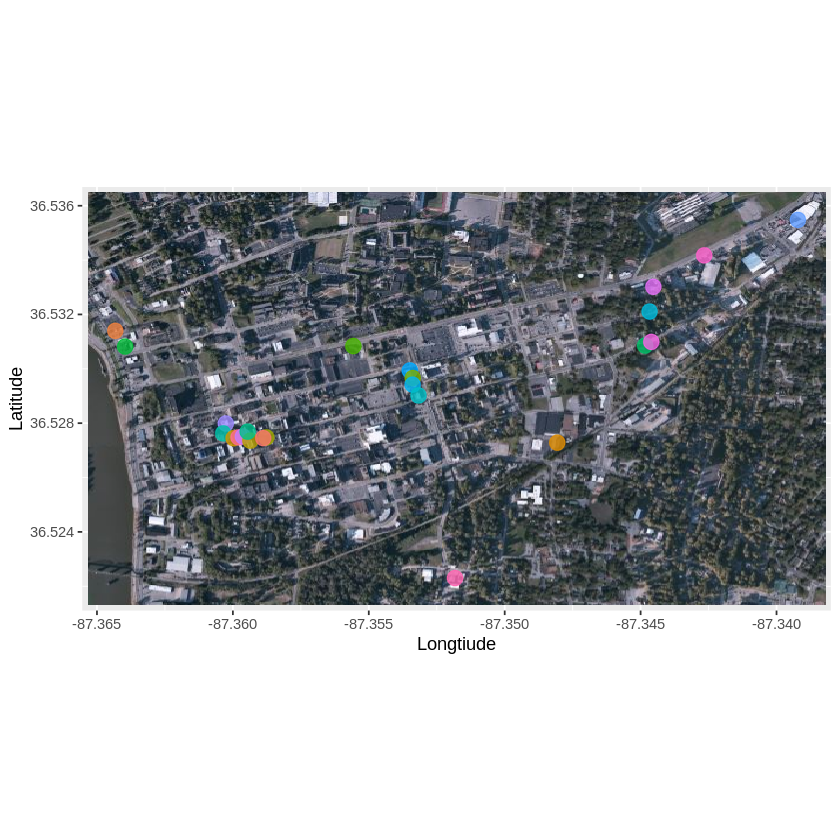

In [40]:
autoplot.OpenStreetMap(APSU) +
  geom_point(data=off_campus_points, aes(x = x, y = y, color=name), size = 4, alpha = 0.8) +
  labs(x="Longtiude", y="Latitude") + theme(legend.position = "none")

In [6]:
download.file('https://raw.githubusercontent.com/chrismgentry/GIS1-Exercise-6/main/Data/on-campus-dining.kml', 'on-campus-dining.kml')
diningOGR <- readOGR("/content/on-campus-dining.kml")

OGR data source with driver: LIBKML 
Source: "/content/on-campus-dining.kml", layer: "Campus Points"
with 5 features
It has 11 fields


In [7]:
on_campus_points <- cbind(diningOGR@data,diningOGR@coords)
on_campus_points[c(2:11,14)] <- NULL
colnames(on_campus_points) <- c("name","x","y")

In [8]:
on_campus_points

name              x         y       
1 Starbucks         -87.35267 36.53267
2 Subway            -87.35402 36.53405
3 Papa John's       -87.35396 36.53304
4 Chic-Fil-A        -87.35400 36.53309
5 Einstein's Bagels -87.35400 36.53300

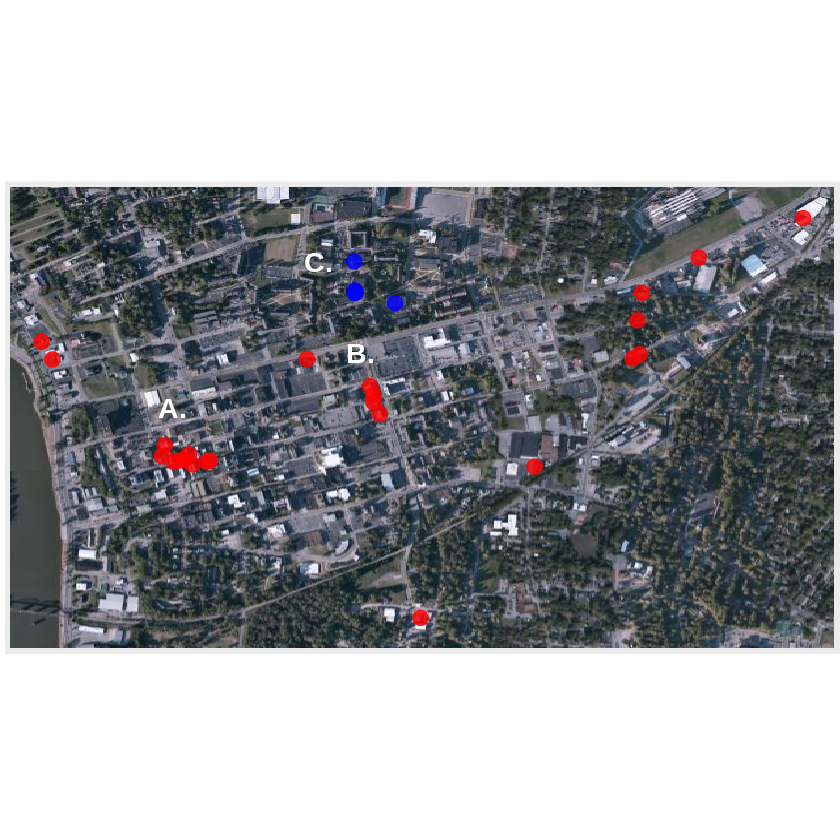

In [49]:
base_map <- autoplot.OpenStreetMap(APSU) +
  geom_point(data=off_campus_points, aes(x = x, y = y), color = "red", size = 4, alpha = 0.8) + 
  geom_point(data=on_campus_points, aes(x = x, y = y), color= "blue", size = 4, alpha = 0.8) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
        axis.line=element_blank(), axis.text.x=element_blank(), axis.text.y=element_blank(),axis.ticks=element_blank(), 
        axis.title.x=element_blank(), axis.title.y=element_blank(), 
        plot.margin = unit(c(0,0,0,0), "cm")) +
  annotate(geom = "text", x = -87.3600, y = 36.5292, label = "A.", size = 6, color = "white", fontface = 2) +
  annotate(geom = "text", x = -87.3538, y = 36.5310, label = "B.", size = 6, color = "white", fontface = 2) +
  annotate(geom = "text", x = -87.3552, y = 36.5340, label = "C.", size = 6, color = "white", fontface = 2)
base_map

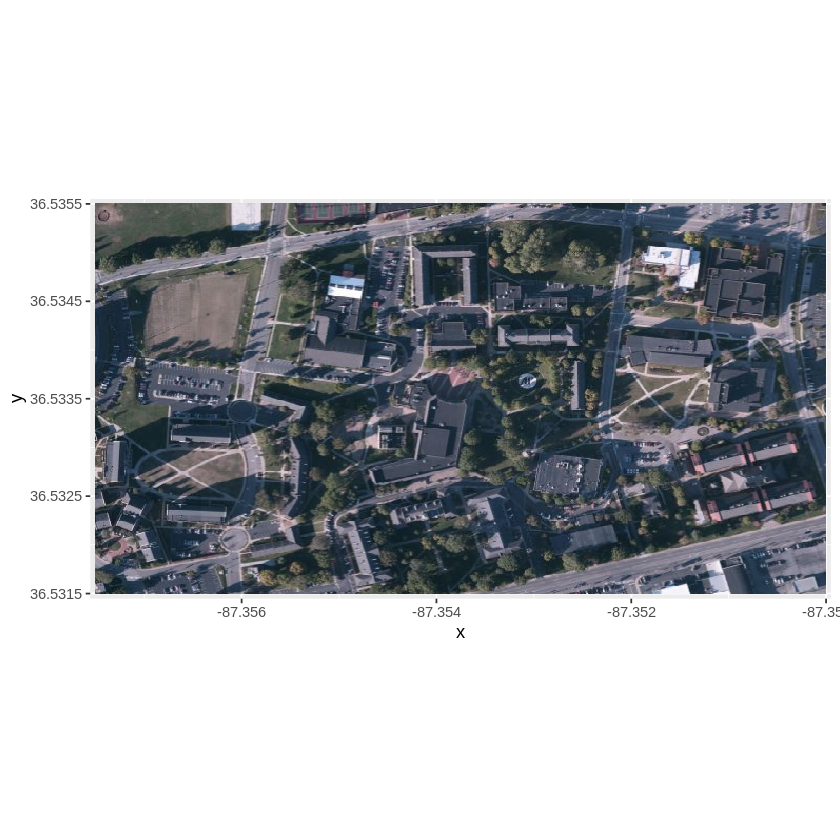

In [10]:
inset_map <- suppressWarnings(openmap(c(36.5355,-87.3575),c(36.5315,-87.3500), type='bing'))
campus_inset_map <- openproj(inset_map, CRS = 'epsg 4326')
autoplot.OpenStreetMap(campus_inset_map)

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



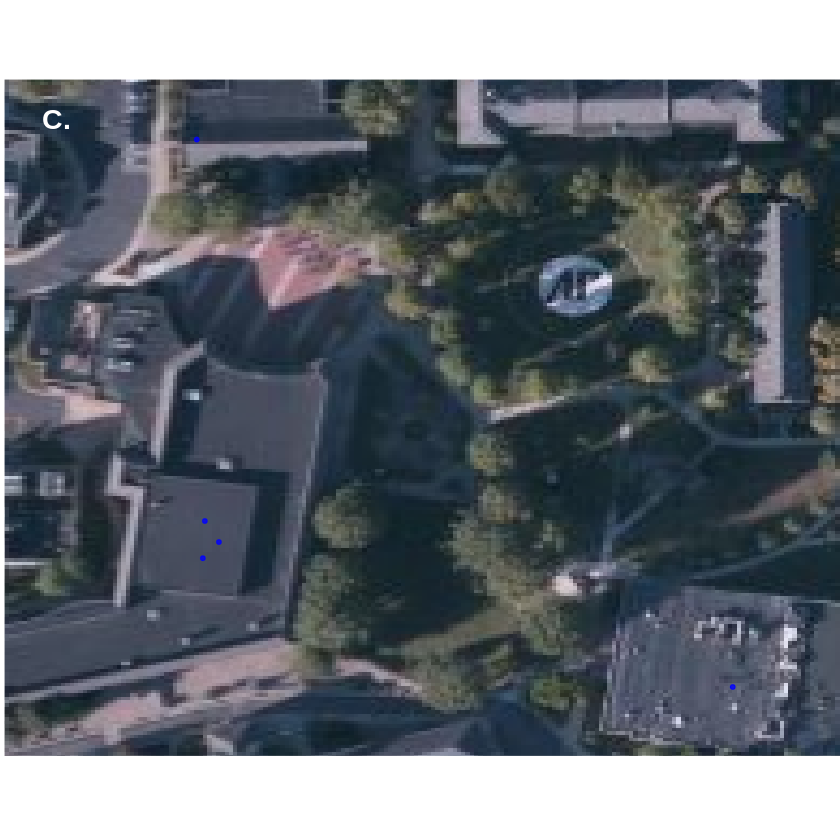

In [42]:
campus_inset <- autoplot.OpenStreetMap(campus_inset_map) +
  geom_point(data=on_campus_points, aes(x = x, y = y), color= "blue", size = 1, alpha = 0.8) +
  coord_fixed(xlim = c(-87.3545,-87.3524), ylim = c(36.5325,36.5342)) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
        axis.line=element_blank(), axis.text.x=element_blank(), axis.text.y=element_blank(),axis.ticks=element_blank(), 
        axis.title.x=element_blank(), axis.title.y=element_blank(), 
        plot.margin = unit(c(0,0,0,0), "cm")) +
  annotate(geom = "text", x = -87.35437, y = 36.5341, label = "C.", size = 6, color = "white", fontface = 2)
campus_inset

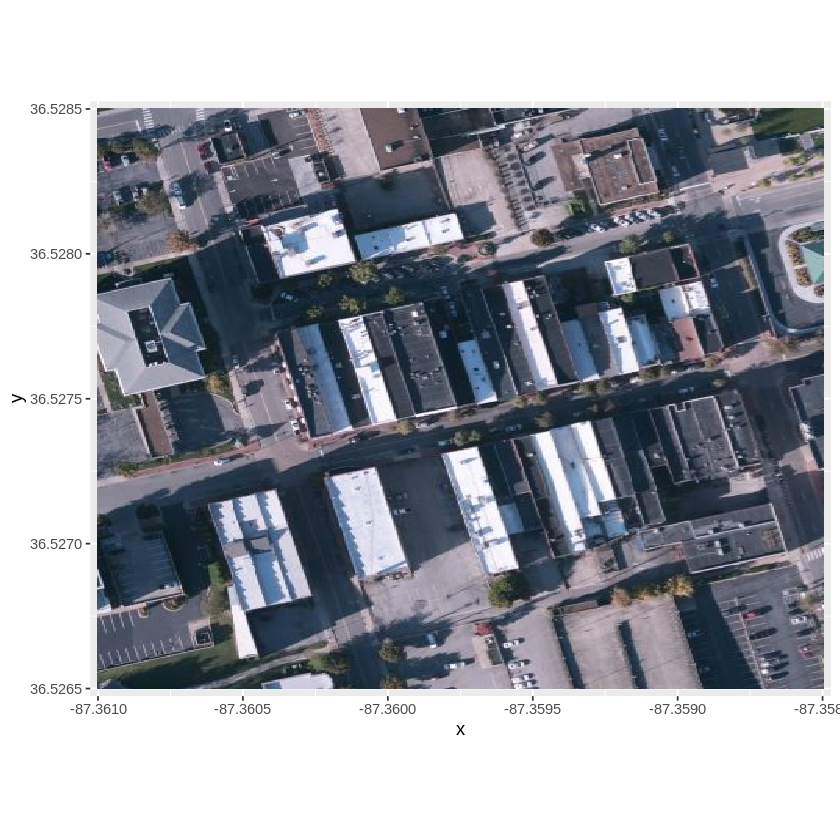

In [12]:
clarksville_inset_map <- suppressWarnings(openmap(c(36.5285,-87.3610),c(36.5265,-87.3585), type='bing'))
downtown_inset_map <- openproj(clarksville_inset_map, CRS = 'epsg 4326')
autoplot.OpenStreetMap(downtown_inset_map)

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



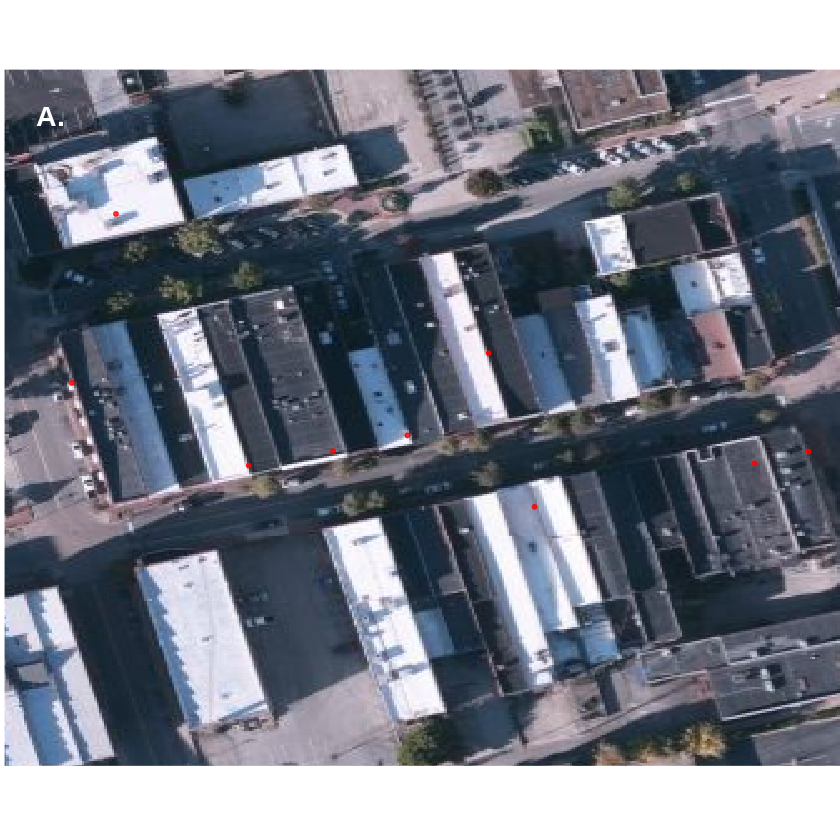

In [43]:
downtown_inset <- autoplot.OpenStreetMap(downtown_inset_map) +
  geom_point(data=off_campus_points, aes(x = x, y = y), color= "red", size = 1, alpha = 0.8) +
  coord_fixed(xlim = c(-87.3605,-87.3587), ylim = c(36.5268,36.5283)) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
        axis.line=element_blank(), axis.text.x=element_blank(), axis.text.y=element_blank(),axis.ticks=element_blank(), 
        axis.title.x=element_blank(), axis.title.y=element_blank(), 
        plot.margin = unit(c(0,0,0,0), "cm")) +
  annotate(geom = "text", x = -87.3604, y = 36.5282, label = "A.", size = 6, color = "white", fontface = 2)
downtown_inset

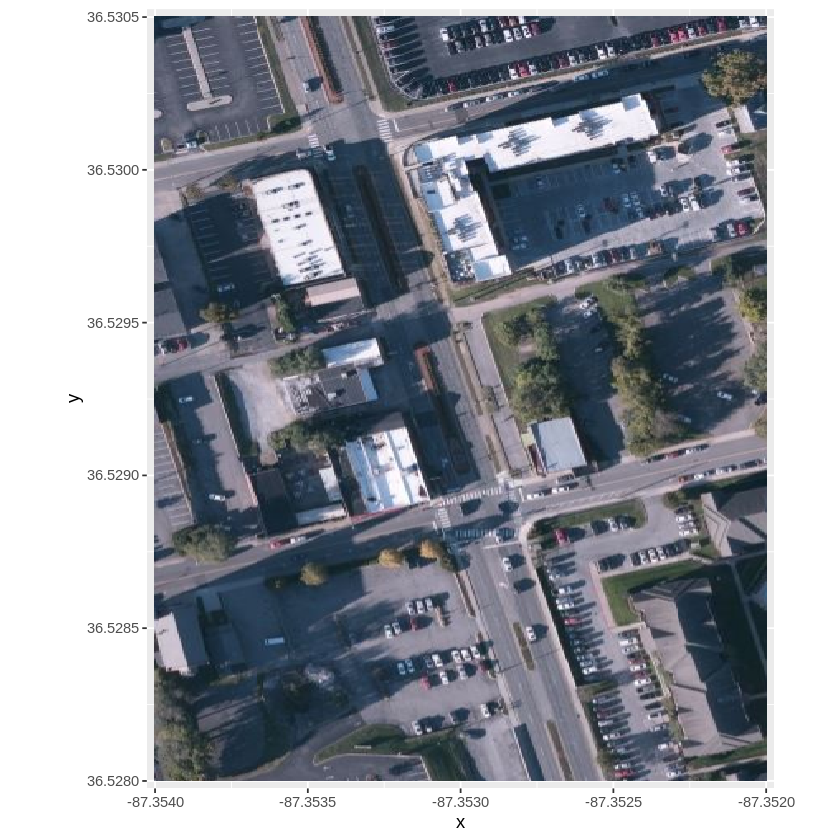

In [14]:
university_st_map <- suppressWarnings(openmap(c(36.5305,-87.354),c(36.5280,-87.352), type='bing'))
university_st_inset_map <- openproj(university_st_map, CRS = 'epsg 4326')
autoplot.OpenStreetMap(university_st_inset_map)

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



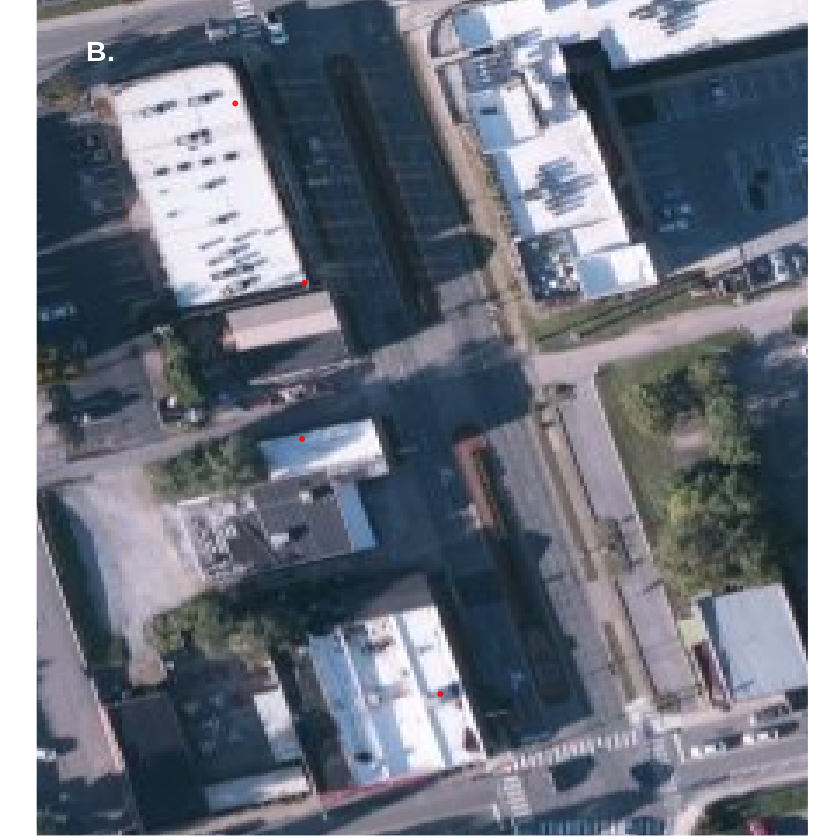

In [56]:
university_st_inset <- autoplot.OpenStreetMap(university_st_inset_map) +
  geom_point(data=off_campus_points, aes(x = x, y = y), color= "red", size = 1, alpha = 0.8) +
  coord_fixed(xlim = c(-87.3538,-87.3526), ylim = c(36.5288,36.5301)) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
        axis.line=element_blank(), axis.text.x=element_blank(), axis.text.y=element_blank(),axis.ticks=element_blank(), 
        axis.title.x=element_blank(), axis.title.y=element_blank(), 
        plot.margin = unit(c(0,0,0,0), "cm")) +
  annotate(geom = "text", x = -87.3537, y = 36.53002, label = "B.", size = 6, color = "white", fontface = 2)
university_st_inset

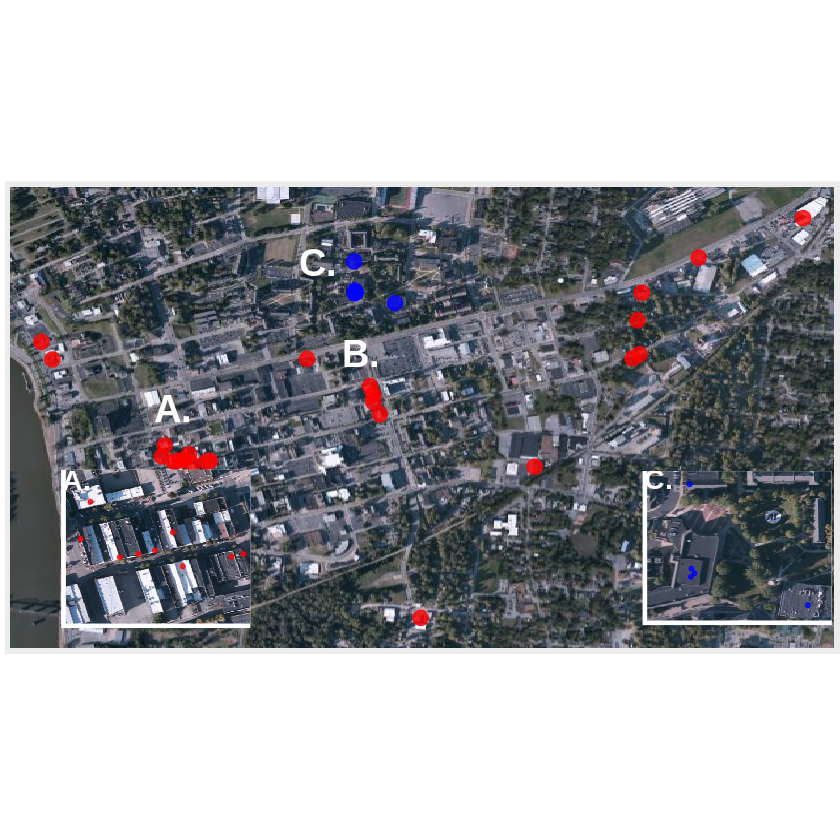

In [45]:
ggdraw() +
draw_plot(base_map) + 
draw_plot(campus_inset, x = 0.765, y = 0.235, width = 0.225, height = 0.225) +
draw_plot(downtown_inset, x = 0.073, y = 0.234, width = 0.225, height = 0.225)

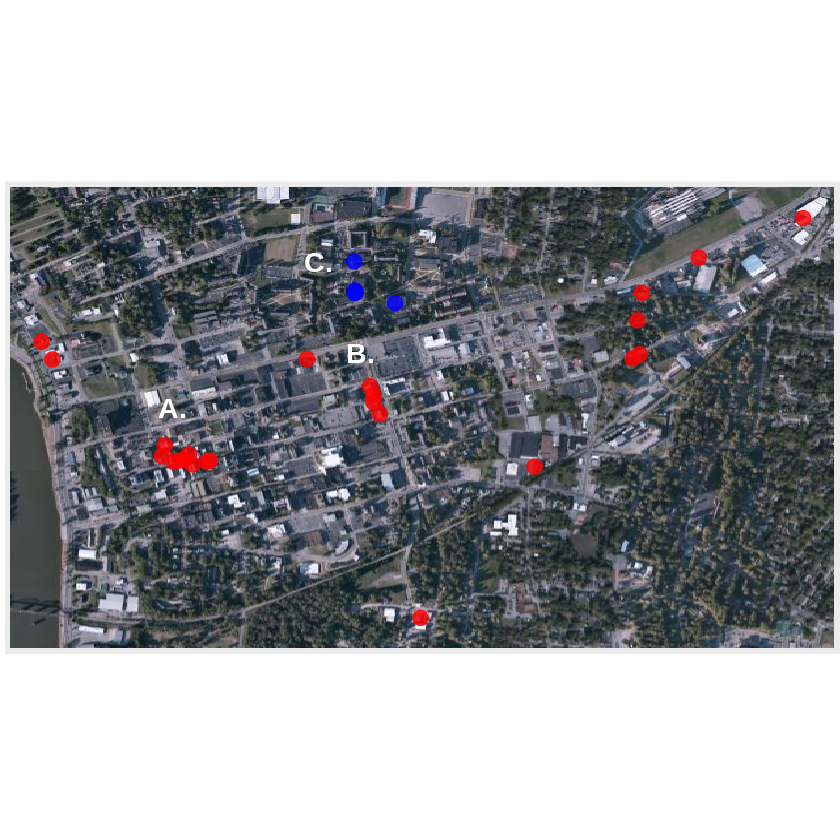

In [50]:
A <- plot_grid(base_map)
A

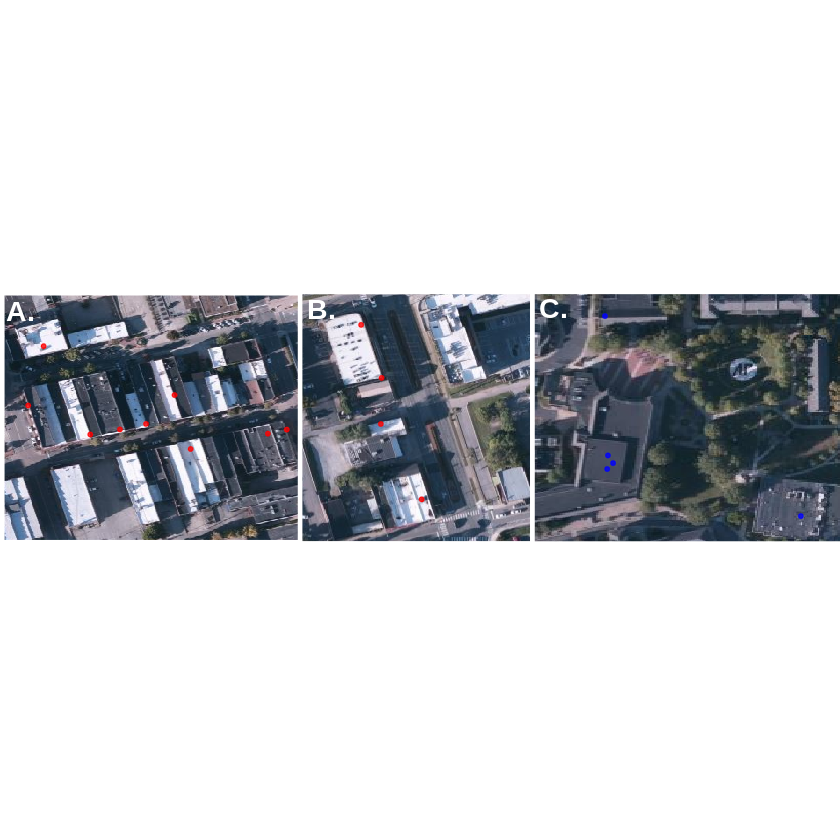

In [47]:
B <- plot_grid(downtown_inset,university_st_inset,campus_inset, 
               nrow = 1, rel_widths = c(0.5,0.39,0.52))
B

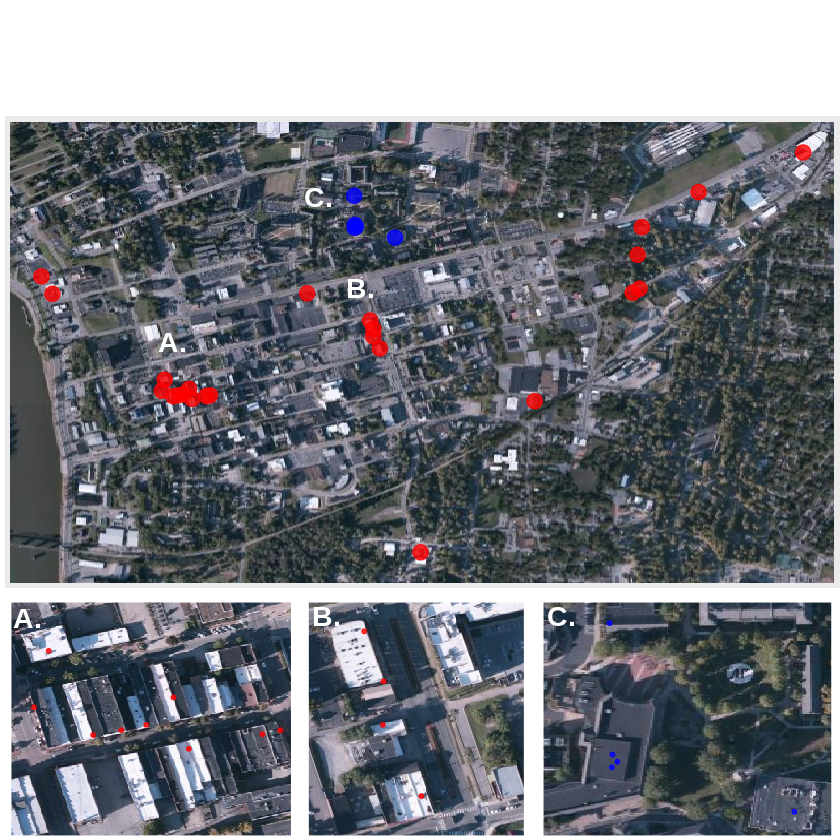

In [51]:
AB <- plot_grid(A,NULL,B, nrow = 3, rel_heights = c(1,-0.15,0.335))
AB